<a href="https://colab.research.google.com/github/SangMin316/Computer-Vision/blob/main/opencv_tutorial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#2021학년도 2학기 패턴인식 L04 실습자료

작성자: 서울시립대학교 인공지능학과 정지영 교수

# 1. Environment Setting



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab import drive
from google.colab.patches import cv2_imshow

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


f# 2. General OpenCV-Python Tutorial
https://docs.opencv.org/master/d6/d00/tutorial_py_root.html

# 3. Getting Started with Images

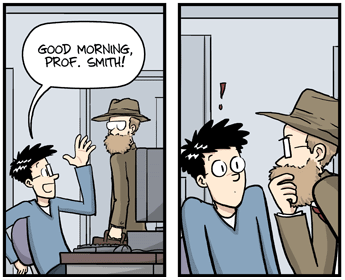

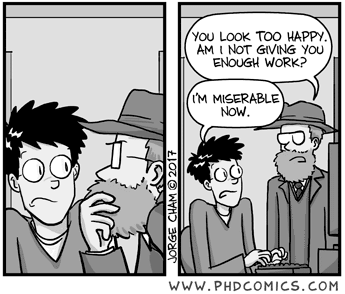

True

In [2]:
image_path = "drive/My Drive/Colab Notebooks/pattern recognition/image/"
# imread(이미지 경로, parameter) parmeter = 0 이면 흑백, 1이면 color
img1 = cv.imread(image_path+"phdcomics01.png",1)
img2 = cv.imread(image_path+"phdcomics02.png",0)
# cv2_imshow()는 이미지 띄우는거
cv2_imshow(img1)
cv2_imshow(img2)
# 이미지 저장하는거 
cv.imwrite(image_path+'graycomics.png',img2)

# 4. Drawing Functions

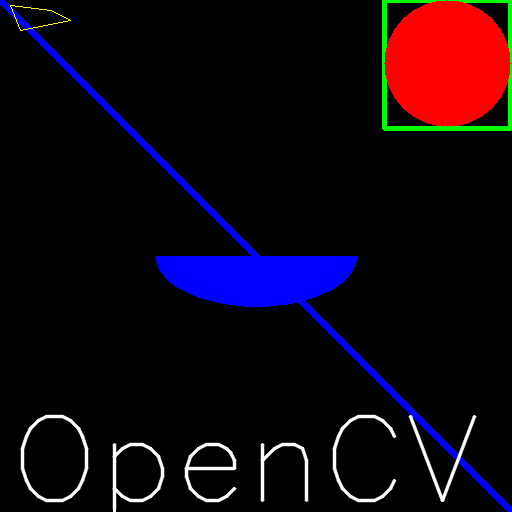

In [3]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv.line(img,(0,0),(511,511),(255,0,0),5)
# (배경,시작점,끝점,색(B,G,R),굵기)

# Drawing rectangle
img = cv.rectangle(img,(384,0),(510,128),(0,255,0),3)

# Drawing circle
img = cv.circle(img,(447,63), 63, (0,0,255), -1)
#(배경, 센터, Radius, 색깔,  )

# Drawing ellipse
img = cv.ellipse(img,(256,256),(100,50),0,0,180,255,-1)

# Drawing polygon
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv.polylines(img,[pts],True,(0,255,255))

# Adding Text to Images
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv.LINE_AA)

cv2_imshow(img)

# 5. Basic Image Operations

In [4]:
image_path = "drive/My Drive/Colab Notebooks/pattern recognition/image/"

img = cv.imread(image_path+"phdcomics01.png",1)
#왼쪽상단이 0,0에서 시작함.
px = img[100,100] # 100,100에 성분이 나옴, [B,R,G]
print('BPG values of (100,100)pixel:',px)

# accessing only blue pixel
blue = img[100,100,0]  # BGR 이러면 blue값만 나옴 ,2는 red

print(blue)

# accessing RED value
print(img.item(10,10,2)) # item으로도 할수 있어 (100,100)의 red값

# modifying RED value
img.itemset((10,10,2),100) # 값을 수정하는거야, 일종의 point opretor
print(img.item(10,10,2))

# accessing image properties
print(img.shape) # tuple of (height, width, channels)
print(img.size)  # height x width x channels
print(img.dtype) # image datatype # uint8 양수만 2*8승개 즉 0~255

BPG values of (100,100)pixel: [212 203 195]
212
195
100
(280, 345, 3)
289800
uint8


#6. Point Operators
## Color Transform

[212 203 195]
[106  20 212]


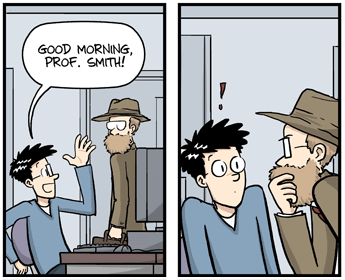

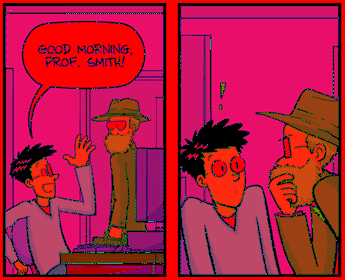

In [5]:
# 기존에 GRB를 배열로 되어있는 color space를 다른 color space로 바꿔주는거
# hsv: hue, saturaion,value (색,체도,명도)
hsvimg = cv.cvtColor(img, cv.COLOR_BGR2HSV) 
bgr = img[100,100]
print(bgr)  
hsv = hsvimg[100,100]
print(hsv)
cv2_imshow(img)
cv2_imshow(hsvimg) # 이건 RGB기준으로 뽑아내기에 이상한 그림으로 나오는겨

## (Adaptive) Thresholding

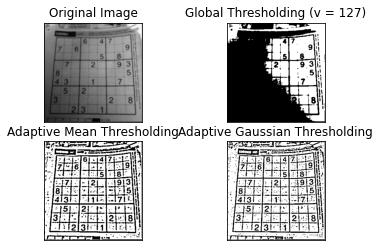

In [6]:
# 선과 숫자만 있는 이미지로 남기고 싶다. 일종의 Binary image
img = cv.imread(image_path+'sudoku.png',0)
# 127을 threshold로 잡고 그 아래는 검은색, 그 위는 흰색
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
#주변값들고려하는 neighborhood operators
# adaptiveTheshold(image,maxValue,adaptiveMethod,thresholdType,blockSzie,C[,dst])
# dst는 destination image 
# ADAPTIVE_THRESH_MEAN_C 방법: blockSize^2에서 평균을 구하고 - C해주는 거
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)

th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
#subplot으로 여러 이미지 띄우기
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([]) # 좌표값들 없애는거
plt.show()

#7. Linear / Non-linear filtering
## Image Blurring

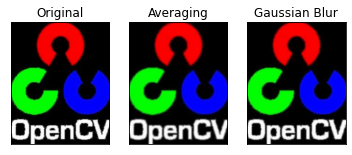

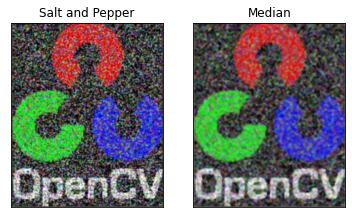

In [7]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(image_path+'opencv_logo.png')
kernel = np.ones((5,5),np.float32)/25 # 내가만든 kernel이고 평균해주는 filter야 
dst = cv.filter2D(img,-1,kernel)  # (img, ??, kernnel)
blur = cv.GaussianBlur(img,(5,5),0) # (사이즈,??) 가우시안 

# subplot(x,y,z): x by y로 이미지 배치할건데 그중 z번째 
plt.subplot(131),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(blur),plt.title('Gaussian Blur')
plt.xticks([]), plt.yticks([])
plt.show()

# solt and pepper 처리된 image
snpimg = cv.imread(image_path+'opencv_logo_snp.png')
median = cv.medianBlur(snpimg,5)
plt.subplot(121),plt.imshow(snpimg),plt.title('Salt and Pepper')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

## Bilateral Filtering

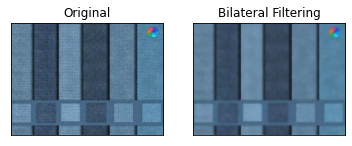

In [8]:
img = cv.imread(image_path+'bilateral.png',1)
blur = cv.bilateralFilter(img,9,75,75) #(src,d,sigmaColor,sigmaSpace[,dst[,borderType]])
# 공부하기
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Bilateral Filtering')
plt.xticks([]), plt.yticks([])
plt.show()

#8. Geometric Transformations

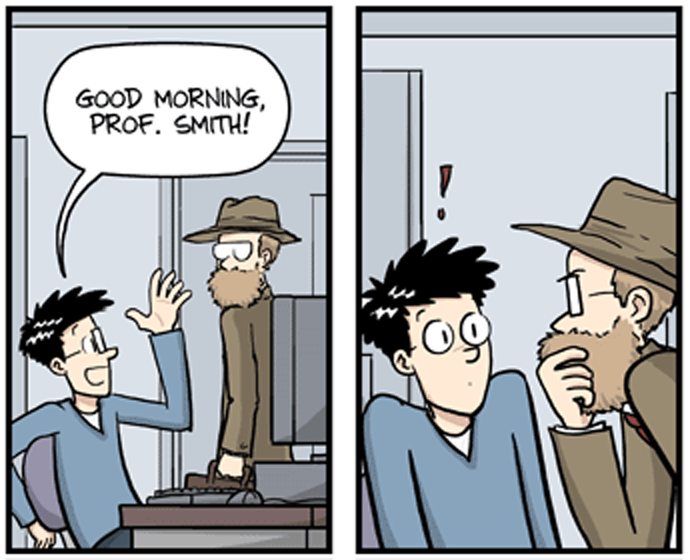

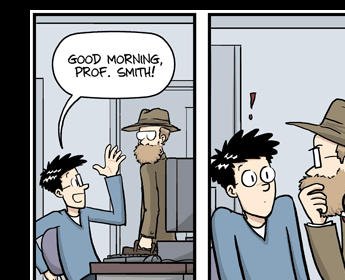

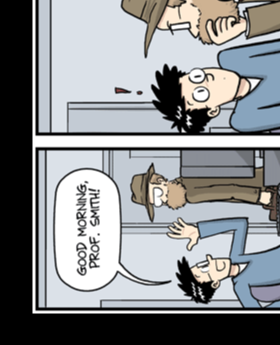

In [9]:
img = cv.imread(image_path+"phdcomics01.png",1)

# scaling
height, width = img.shape[:2]
# size 바꿔주는거 , interpolation 방식은 여러가지가 있음
# 주로 INTER_CUBIC : 주변에 있는 4개에 픽셀을 3차 다항식으로 계산
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)
cv2_imshow(res)

#warpAffine이 더 높은 차원이라서 translation과 rotation할 수있음
# translation
M = np.float32([[1,0,30],[0,1,10]])  # M=[1 0 30; 0 1 10]:2x3 matrix
# Affine transform 메트릭스 2*3, x방행으로 30, y방향으로 30 이도한다. 
dst = cv.warpAffine(img,M,(width,height)) 
cv2_imshow(dst)

 # rotation
 # getRotatiomMatrix2D는 (센터, 몇도 돌리고 싶은지) 넣어주면
 # 회전행렬나옴
M = cv.getRotationMatrix2D((width/2,height/2),90,1) # 90 degree wrt image center
rot = cv.warpAffine(img,M,(height,width))
cv2_imshow(rot)

[[  1.           0.33333333 -16.66666667]
 [  0.           1.           0.        ]]


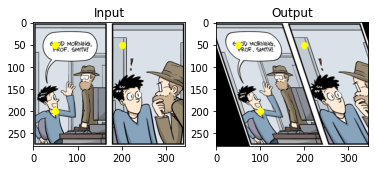

[[ 5.98802395e-01 -1.08303249e-01  3.00000000e+01]
 [ 0.00000000e+00  5.98802395e-01  0.00000000e+00]
 [-0.00000000e+00 -1.44836680e-03  1.00000000e+00]]


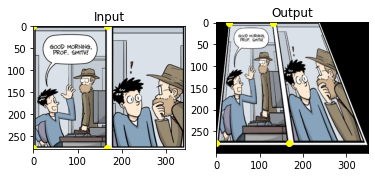

In [10]:
# affine transformation
# 평행이 유지되는 
rows,cols,ch = img.shape
# affine transformation 할때 3개의 기준점을 잡고(평행성분 유지하기에는 3개면 충분, (DOF이 6이라서)
# 그 기준점이 어떻게 변할지 (단 평행하게) 정해줌으로 affine transform 해줄수 있음
pts1 = np.float32([[50,50],[200,50],[50,200]])  
pts2 = np.float32([[50,50],[200,50],[100,200]])

#getAffineTransform(pts1,pts2) 기준점 두개 넣어주면 AffineTransform 행렬 나옴
M = cv.getAffineTransform(pts1,pts2) # M is a 2x3 matrix
print(M)

dst = cv.warpAffine(img,M,(cols,rows)) #(image,행렬,크기)

plt.subplot(121),plt.imshow(img[:,:,[2,1,0]]),plt.title('Input')
plt.scatter(pts1[:,0],pts1[:,1],c='yellow')
plt.subplot(122),plt.imshow(dst[:,:,[2,1,0]]),plt.title('Output')
plt.scatter(pts2[:,0],pts2[:,1],c='yellow')
plt.show()


# perspective transformation
# 평행성은 사라지고, 단 직선성은 남아있게
# dof가 8이라서 기준점을 4개 잡아야해
pts1 = np.float32([[0,0],[167,0],[0,277],[167,277]])
pts2 = np.float32([[30,0],[130,0],[0,277],[167,277]])

M = cv.getPerspectiveTransform(pts1,pts2) # M is a 3x3 matrix
print(M)


dst = cv.warpPerspective(img,M,(350,300)) 

plt.subplot(121),plt.imshow(img[:,:,[2,1,0]]),plt.title('Input')
plt.scatter(pts1[:,0],pts1[:,1],c='yellow')
plt.subplot(122),plt.imshow(dst[:,:,[2,1,0]]),plt.title('Output')
plt.scatter(pts2[:,0],pts2[:,1],c='yellow')
plt.show()

In [ ]:
# Fourier transfrom
# image는 디지털 자료라서 Discrete Fourier Transform(DFT)사용
# time domain or image domain -> frequency domain
# image에서 밋밋한 영역은 low frequency, edge부분은 high frequency
# DFT 시간이 많이 걸려서 FastFourierTransform(FFT)씀

(Text(0.5, 1.0, 'Magnitude Spectrum'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

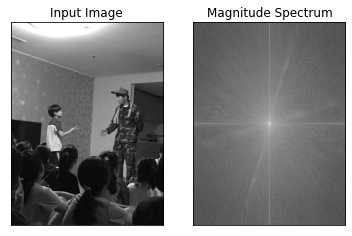

In [14]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread(image_path+'memory1.jpg',0) # a메시
# numpy에 있는 2d fft(np.fft.fft2)를 적용
f = np.fft.fft2(img) # 이 값은 복소수도 포함된 값이라서 바로 표현할수 없어
# f는 왼쪽 상단에 가장 주파수가 낮은 값을 가짐, 근데 복소수랑 음수도있는 값이라서
# 원점을 중앙으로 잡는게 좋음 그래서 ffshift해줘야해
fshift = np.fft.fftshift(f) 
# 표현법에는 절대값을 쓰윈 magnitude, phase? 두가지 방벙이 있아
magnitude_spectrum = 20*np.log(np.abs(fshift))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

In [ ]:
# FT는  필터링하는데 사용됨
# 이미지 도메인에서의 convolution은 frequency doomain에서의 곱샘으로 바뀜
# 그래서 시간 소모 적음
# 이미지와 커널을 Fourier transform 시킨후 그 두개를 곱한 output을
# 다시 inverse fourier transform 시켜서 다시 image domain으로 갖고 오면됨
# 요런 방법도 있다~~

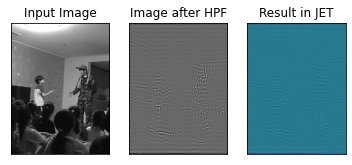

In [15]:
# high pass filtering 높은 주파수만 패스시키고 저주파수는 죽이는거
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
# ft된 image에서 원점에 낮은 값들이 있는데, 원점을 기준으로 window size =60 은
# 다 0으로 만드는 것
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
# ifftshift 다시 원점을 왼쪽 상단으로 옮기는 것
f_ishift = np.fft.ifftshift(fshift)
# inverse fourier transform
img_back = np.fft.ifft2(f_ishift)
# ift한 값이 complex value라서 real부분만 취해주는거
img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()
# 고주파수, 즉 edge부분을 잘 나태내줌

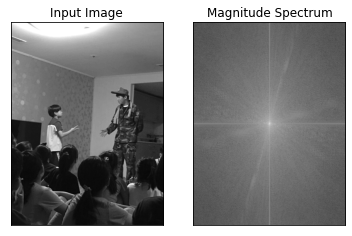

In [17]:
#위 과정을 openCV로도 하는거야
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread(image_path+'memory1.jpg',0)
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

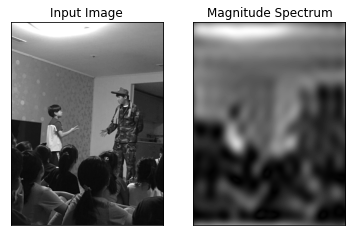

In [20]:
# low filter, 주파수 낮은거만 값을 갖고 나머지는 버리겠다
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-10:crow+10, ccol-10:ccol+10] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# 다 흐려지는 효과가 있엉
# 요즘 computer vision에서는 많이 안쓰이고, 신호분석에서는 자주 쓰임

In [ ]:
#image pyramids
# 요즘은 image 크키가 다큼..
# 그래서 큰그림의 크기를 1/2 하고(level1) 또 1/2(level2) 등등으로 만드는거
# gaussian pytamids 와 laplace pyramids가 있음
# gaussian pytamids gaussian blur를 처리한 후 사진 서브샘플을 취하는거야
# 영상에서 detect할때 원본에서 바로 detect하면 detect하는 물체가 크기가 작은 경우
# 시간 오래 걸림 그래서 pyramids에 있는 것부터 detect하면서 마지막 원본에서 detect함

# lapalce pyramids는 작은 피라미드에서 큰 피라미드 만들떄
# 해상도가 떨어짐, 키운 파일이랑 원본이랑 차이를 비교하면 edge부분을 취할 수있음
# 이 원본이랑 키운 파일의 차이를 구한게 laplacian pyramids 

#image blending
# 두개의 이미지를 붙였을때 경계가 뚜렷
# laplacian pyramids를 이용해서 좀 자연스럽게 붙임
# how to
# 두개의 이미지 A,B에 대해서 gaussian pyramids 만듬(렙6까지 코드에선)
# 그후 laplacian pyramids를 만들고
# 각 revel에 laplacian pyramids를 왼쪽은 A가 오른 쪽은 B가 오게 붙임
# 제일작은 것부터 레벨업 시켜서 Blending image를 얻을 수 있음